# NASA and ESA Infinity Velocity Comparsion
Written by Jackey Fang<br>
<br>
**Last Update**<br>
2026-02-25

In [1]:
import matplotlib.pyplot as plt
import requests
import time
import numpy as np
import seaborn as sns
from astropy.table import QTable, vstack

# ESA Conversion

In [19]:
def est_vinf(vimp):
    MU = 398600.435436
    R_EARTH = 6378.137
    energy = 0.5 * (vimp ** 2) - MU / R_EARTH
    vinf = np.sqrt(np.maximum(2 * energy, 0.0))

    return vinf

In [20]:
esa_raw = QTable.read('data/esa_ipcum.ecsv', format='ascii.ecsv')
esa_vimp = np.array(esa_raw['vel_km_s'], dtype=float)

In [21]:
esa_vinf = est_vinf(esa_vimp)
esa_ip = np.array(esa_raw['ip_cum'], dtype=float)

# Load NASA

In [22]:
NASA_SENTRY_table_sum = QTable.read('data/nasa_ipcum.ecsv', format='ascii.ecsv')

In [24]:
nasa_vinf = np.array(NASA_SENTRY_table_sum['v_inf'], dtype=float)
nasa_ip = np.array(NASA_SENTRY_table_sum['ip'], dtype=float)

# Plot

In [29]:
def plot_vinf_ip(nasa_vinf, esa_vinf, nasa_ip, esa_ip):
    # Define bin
    bin_size = 1
    nasa_binned = np.round(nasa_vinf / bin_size) * bin_size
    esa_binned = np.round(esa_vinf / bin_size) * bin_size

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.set_style('whitegrid')

    sns.lineplot(
        x = nasa_binned,
        y = nasa_ip,
        alpha = 0.6,
        estimator = np.median,
        errorbar = ('pi', 100),
        color = 'green',
        linewidth = 2,
        ax = ax,
        label = 'NASA $V_{inf}$'
    )
    
    sns.lineplot(
        x = esa_binned,
        y = esa_ip,
        alpha = 1,
        estimator = np.median,
        errorbar = ('pi', 100),
        color = 'royalblue',
        linestyle = '--',
        linewidth = 2,
        ax = ax,
        label = 'ESA $V_{inf}$'
    )
    ax.set_yscale('log')
    ax.invert_xaxis()

    ax.set_title(r"Impact Probability vs. $V_{inf}$")
    ax.set_ylabel("Cumulative Impact Probability (log)")
    ax.set_xlabel("$V_{inf}$ (km/s)")
    ax.legend();

    plt.tight_layout()
    plt.show()

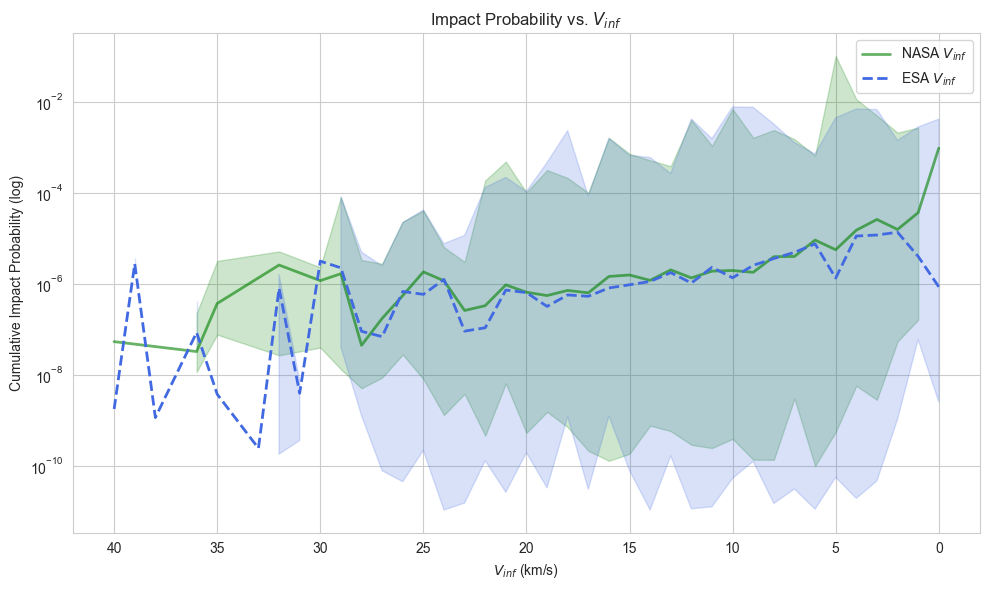

In [30]:
plot_vinf_ip(nasa_vinf, esa_vinf, nasa_ip, esa_ip)